# **LAB 01: TRỰC QUAN HÓA DỮ LIỆU VỚI PYTHON**
#### Môn học: Trực quan hóa dữ liệu
#### Nhóm: 5


## **A. Thu thập dữ liệu**

Đối với một doanh nghiệp, một trong những yếu tố cốt lõi để cấu thành nên sự thành công đó chính là khách hàng. Doanh nghiệp không bán sản phẩm họ cung cấp, mà họ bán sản phẩm mà người khác cần. Thật khó để một doanh nghiệp có thể duy trì nếu họ không có hoặc mất đi những khách hàng của chính họ. Vậy làm thế nào để một doanh nghiệp có thể thu hút ngày càng nhiều khách hàng cũng như đồng thời giữ được những người trung thành, đặc biệt là trong một thị trường đòi hỏi nhiều hơn là chỉ bán dịch vụ và sản phẩm đơn thuần. Chính vì thế, việc tìm hiểu và phân tích nhu cầu khách hàng chính là một trong những việc làm quan trọng, một bài toàn toán khó cho các doanh nghiệp hiện nay.

Thấy được tầm quan trọng của việc phân tích khách hàng, nhóm 5 lựa chọn bộ dữ liệu *Shop Customer Data* cho lab 01. Bộ dữ liệu được chia sẻ miễn phí trên nền tảng Kaggle. (Link dataset: https://www.kaggle.com/datasets/datascientistanna/customers-dataset)

License: <a href="http://opendatacommons.org/licenses/dbcl/1.0/">Database: Open Database, Contents: Database Contents</a>


Bộ dữ liệu được thu thập thủ công. Phương pháp thu thâp là thu thập thông qua nghiên cứu kéo dài 1 năm về khách hàng của các cửa hàng địa phương.


## **B. Khám phá dữ liệu**

### **Import các thư viện**

In [2]:
import pandas as pd

import seaborn as sns
import plotly.express as px
import plotly.offline as py
import matplotlib.pyplot as plt

%matplotlib inline  
py.init_notebook_mode(connected=True)

### **Đọc file dữ liệu vào dataframe**

In [3]:
df=pd.read_csv("Customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


### **Tiền xử lý và khám phá dữ liệu**

**Số dòng** và **số cột** của bộ dữ liệu: 2000 dòng, 8 cột

In [4]:
num_rows, num_cols = df.shape
print("Num rows: ", num_rows)
print("Num cols: ", num_cols)

Num rows:  2000
Num cols:  8


**Ý nghĩa của mỗi dòng**: Thông tin của một khách hàng mua sắm ở cửa hàng. Không có dòng nào mang ý nghĩa khác. 

In [5]:
df.head(1)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4


Kiểm tra xem có dòng nào bị trùng lặp hay không:

In [6]:
df.duplicated().sum()

0

**Ý nghĩa của mỗi cột**: 

- `Customer ID`: ID khách hàng
- `Gender`: Giới tính
- `Age`: Tuổi
- `Annual Income`: Thu nhập hàng năm (đơn vị: $)
- `Spending Score`: Điểm do cửa hàng chấm, dựa trên hành vi và tính chất chi tiêu của khách hàng. Nằm trong khoảng [0,100]
- `Profession`: Nghề nghiệp
- `Work Experience`: Kinh nghiệm làm việc (đơn vị: năm)
- `Family Size`: Số thành viên trong gia đình

Ta sẽ thực hiện chuẩn hóa tên các cột để thuận tiện hơn cho việc sử dụng về sau:

In [7]:
df = df.rename(columns={'Annual Income ($)': 'Annual_Income',
                        'Spending Score (1-100)': 'Spending_Score',
                        'Work Experience':'Work_Experience',
                        'Family Size':'Family_Size'})
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score',
       'Profession', 'Work_Experience', 'Family_Size'],
      dtype='object')

**Kiểu dữ liệu của mỗi cột:**

In [8]:
df.dtypes

CustomerID          int64
Gender             object
Age                 int64
Annual_Income       int64
Spending_Score      int64
Profession         object
Work_Experience     int64
Family_Size         int64
dtype: object

Các cột đều có kiểu dữ liệu phù hợp, không cần xử lý.

**Kiểm tra giá trị bị thiếu:**

In [9]:
df.isna().sum()

CustomerID          0
Gender              0
Age                 0
Annual_Income       0
Spending_Score      0
Profession         35
Work_Experience     0
Family_Size         0
dtype: int64

Có 35 giá trị thiếu ở cột `Profession`.

**Phân bố giá trị của các cột numeric:**

Dựa vào việc kiểm tra kiểu dữ liệu của các cột ở bước trên, ta đang có 6 cột có vẻ thuộc nhóm **numeric** là: `CustomerID`, `Age`, `Annual_Income`, `Spending_Score`, `Work_Experience`, `Family_Size`. Tuy nhiên, cột `CustomerID` thật ra lại là dạng **categorical** (vì ID là mã được đánh dưới dạng 

Bảng thống kê cơ bản về các phân bố giá trị của các thuộc tính **numeric**:

In [10]:
df[['Age', 'Annual_Income', 'Spending_Score', 'Work_Experience', 'Family_Size']].describe()

,Age,Annual_Income,Spending_Score,Work_Experience,Family_Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,48.960000,110731.821500,50.962500,4.102500,3.768500
std,28.429747,45739.536688,27.934661,3.922204,1.970749
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,73.000000,149092.750000,75.000000,7.000000,5.000000
max,99.000000,189974.000000,100.000000,17.000000,9.000000


Nhìn tổng quan, khách hàng có tuổi nhỏ nhất là 0. Ta thử truy vấn:

In [11]:
df[df["Age"]==0]

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Profession,Work_Experience,Family_Size
211,212,Female,0,22000,92,Artist,2,1
228,229,Male,0,33000,64,Marketing,1,1
333,334,Male,0,173743,96,Artist,0,4
440,441,Female,0,57373,29,NaN,0,7
443,444,Female,0,68761,16,Lawyer,1,4
466,467,Male,0,186002,80,Doctor,15,2
559,560,Male,0,151298,89,Artist,0,6
562,563,Female,0,142892,25,Entertainment,8,1
767,768,Female,0,143910,22,Marketing,1,7
794,795,Female,0,147719,86,Lawyer,1,7


Có vẻ như người thu thập đã điền giá trị 0 cho các khách hàng không có thông tin về độ tuổi. Ta sẽ thực hiện 

**Phân bố giá trị của các cột categorical:**

Có 3 cột thuộc nhóm **categorical** là: `CustomerID`, `Gender`, `Profession`

Kiểm tra số giá trị trùng lặp ở cột `CustomerID`:

In [12]:
df["CustomerID"].duplicated().sum()

0

Mỗi ID khách hàng là duy nhất, không có sự trùng lặp

Bỏ qua thuộc tính `CustomerID`, ta có bảng thống kê cơ bản về các phân bố giá trị của các thuộc tính **categorical** còn lại:

In [13]:
df[['Gender','Profession']].describe()

,Gender,Profession
count,2000,1965
unique,2,9
top,Female,Artist
freq,1186,612


**Làm sạch dữ liệu:**

Ta lần lượt đi kiểm tra giá trị trong từng cột dữ liệu và tiền xử lý (nếu cần)

**Cột `CustomerID`**: Dựa vào kết quả kiểm tra các bước ở trên, các giá trị ở cột `CustomerID` đều khác nhau nên không có vấn đề gì cần tiền xử lý.

**Cột `Gender`**:

<AxesSubplot: xlabel='Gender', ylabel='count'>

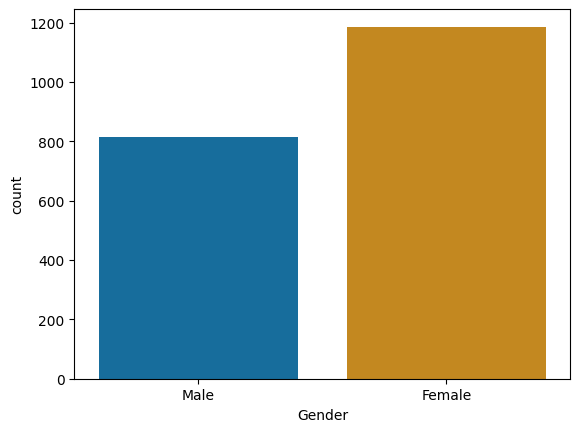

In [14]:
sns.countplot(x='Gender', data=df,palette="colorblind")

**Cột `Age`**:

In [15]:
fig = px.box(df, x="Age",width=800, height=400)
fig.show()

Phân bố của độ tuổi khá đẹp. Ta sẽ thực hiện thay thế những khách hàng có độ tuổi 0 giá trị trung vị các khách hàng có độ tuổi khác 0 để bộ dữ liệu hợp lý hơn: 

In [16]:
df.loc[df["Age"]==0,"Age"]=int(df[df["Age"]>0]["Age"].median())

**Cột `Annual_Income`**:

In [17]:
fig = px.box(df,x='Annual_Income',width=800, height=400)
fig.show()

In [18]:
fig = px.box(df, y="Annual_Income",x='Age')
fig.show()

Nhìn chung thì có một vài outliers, có thể đây là những trường hợp cá biệt nên ta sẽ không xử lý.

**Cột `Spending_Score`**: là cột do chủ cửa hàng điền, ta sẽ bàn luận sâu hơn khi thực hiện phân tích rõ mối quan hệ các thuộc tính.

**Cột `Profession`**:

<AxesSubplot: xlabel='Profession', ylabel='count'>

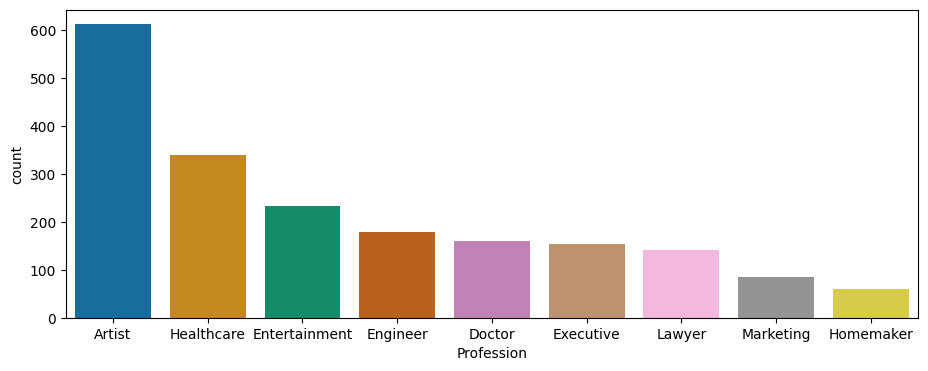

In [19]:
plt.figure(figsize=(11,4))
sns.countplot(x='Profession', data=df,palette="colorblind",order = df['Profession'].value_counts().index)

Điền các giá trị bị thiếu trong cột `Profession` bằng giá trị mới là "other". Việc điền bằng một giá trị mới thay vì dùng các giá trị hiện có sẽ giúp không làm thay đổi nhiều phân bố của các giá trị cũ. Ngoài ra dùng giá trị là 'other', ta không cần train lại mô hình học máy nếu có xuất hiện thêm một vài giá trị `Profession` mới nào khác trong tương lai.

In [20]:
df['Profession'] = df['Profession'].fillna('other')
df['Profession'].isna().sum()

0

<AxesSubplot: xlabel='Profession', ylabel='count'>

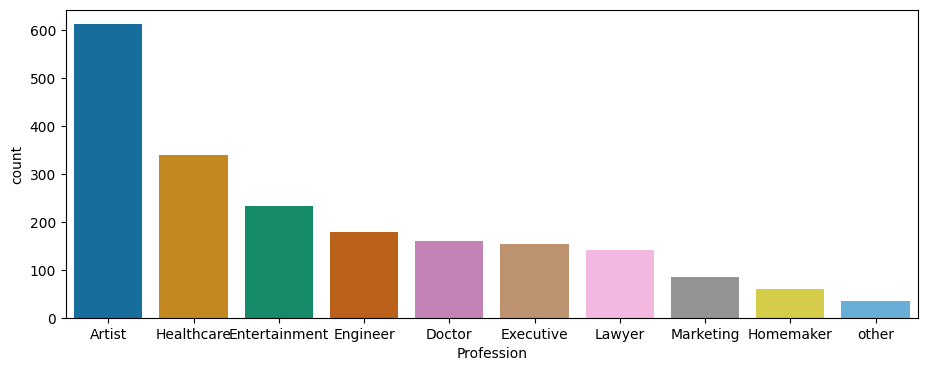

In [21]:
plt.figure(figsize=(11,4))
sns.countplot(x='Profession', data=df,palette="colorblind",order = df['Profession'].value_counts().index)

**Cột `Work_Experience`**:

In [22]:
fig = px.box(df, x="Work_Experience",width=800, height=400)
fig.show()

Nhìn vào đồ thị, ta thấy `Work_Experience` có một giá trị outlier là 17. Thực hiện truy vấn những dòng này:

In [23]:
df[df['Work_Experience'] == 17]

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Profession,Work_Experience,Family_Size
392,393,Male,21,119116,30,Artist,17,4
405,406,Female,65,119889,11,Artist,17,6
473,474,Male,20,130813,92,Artist,17,5
566,567,Female,19,180331,14,Artist,17,5
603,604,Female,91,69720,78,Lawyer,17,6


Với `Profession` là _"Artist"_ thì nhìn chung những outlier vẫn khá hợp lý nên ta sẽ giữ lại 5 dòng này.

In [24]:
fig = px.box(df, y="Work_Experience",x='Age')
fig.show()

Có khá nhiều outliers khi ta trực quan hóa kết hợp với cột `Age`, nhìn vào các outliers ta nhận ra một vài vấn đề sai về dữ liệu như như 8 tuổi có 14 năm kinh nghiệm, 19 tuổi có 17 năm kinh nghiệm,...

In [25]:
df[df['Work_Experience'] - df['Age'] >= 0]

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Profession,Work_Experience,Family_Size
210,211,Female,1,57000,93,Engineer,1,2
230,231,Female,6,93000,53,Lawyer,8,2
234,235,Female,4,84000,54,Artist,9,1
321,322,Male,5,69078,60,Lawyer,13,1
338,339,Female,7,123804,28,Doctor,14,1
...,...,...,...,...,...,...,...,...
1923,1924,Male,2,101718,11,Executive,8,3
1926,1927,Male,3,74607,69,Healthcare,6,1
1951,1952,Male,1,57522,75,Artist,10,5
1984,1985,Female,2,153622,51,Lawyer,6,6


Ta sẽ loại bỏ những dòng có `Work_Experience` lớn hơn `Age`:

In [26]:
df = df.drop(df[df['Work_Experience'] - df['Age'] >= 0].index)

**Cột `Family_Size`:**

In [27]:
fig = px.box(df, x="Family_Size",width=800, height=400)
fig.show()

Dataframe sau khi thực hiện tiền xử lý:

In [28]:
df

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Profession,Work_Experience,Family_Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


#### **C. Khám phá mối quan hệ trong dữ liệu**

Dùng chung `df` để đỡ phải sửa khi merge nha

#### Phân Tích Mối Quan Hệ Giữa 2 Thuộc Tính: Age và Annual Income

**`Để phân tích mối tương quan giữa 2 thuộc tính của dataset, ta thường sử dụng các giá trị sau:`**

**Hệ số tương quan**: Hệ số tương quan (correlation coefficient) là một thước đo độ mạnh của mối tương quan giữa hai biến. Giá trị của hệ số tương quan dao động từ -1 đến 1, với giá trị 0 thể hiện rằng không có mối tương quan giữa hai biến, giá trị -1 thể hiện mối tương quan âm hoàn hảo giữa hai biến, và giá trị 1 thể hiện mối tương quan dương hoàn hảo giữa hai biến.

**Biểu đồ scatterplot**: Scatterplot là biểu đồ sử dụng để trực quan hóa mối tương quan giữa hai biến. Nó thể hiện các điểm trên mặt phẳng, trong đó mỗi điểm thể hiện một cặp giá trị của hai biến. Scatterplot cho phép chúng ta quan sát sự phân bố của các điểm và xác định mức độ tương quan giữa hai biến.

**Heatmap**: Heatmap là biểu đồ sử dụng để trực quan hóa độ tương quan giữa nhiều biến. Nó sử dụng một màu sắc để đại diện cho giá trị độ tương quan, với các giá trị cao được biểu thị bằng màu sắc khác nhau so với các giá trị thấp. Heatmap cho phép chúng ta phân tích mối tương quan giữa nhiều biến cùng lúc.

Đầu tiên, ta có thể trực quan hóa dữ liệu bằng Scatter plot như sau:

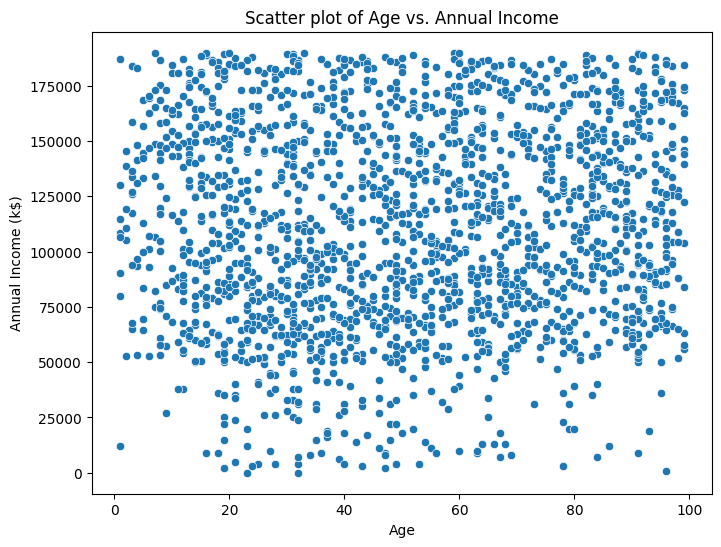

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Annual_Income', data=df)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Scatter plot of Age vs. Annual Income')
plt.show()

Scatter plot cho thấy sự phân tán của dữ liệu giữa độ tuổi và thu nhập hàng năm của các khách hàng. Nhìn tổng quan có một số trường hợp như:
- Một số khách hàng có độ tuổi cao và thu nhập hàng năm cao.
- Một số khách hàng có độ tuổi cao và thu nhập hàng năm thấp.
- Một số khách có độ tuổi thấp nhưng thu nhập hàng năm lại cao. 
- Một số khách có độ tuổi thấp và thu nhập hàng năm thấp.
- Một số khách có độ tuổi trung bình và thu nhập cũng trung bình. 

Có thể thấy rằng không có mối quan hệ tuyệt đối giữa độ tuổi và thu nhập hàng năm, mặc dù có thể nhận thấy xu hướng chung cho rằng thu nhập hàng năm có xu hướng tăng khi độ tuổi tăng.

Tiếp theo, ta có thể tính giá trị **`correlation coefficientcorrelation coefficient(hệ số tương quan)`** và trực quan hóa dữ liệu bằng Heatmap như sau:

Correlation_coefficient:  0.042340841721063525


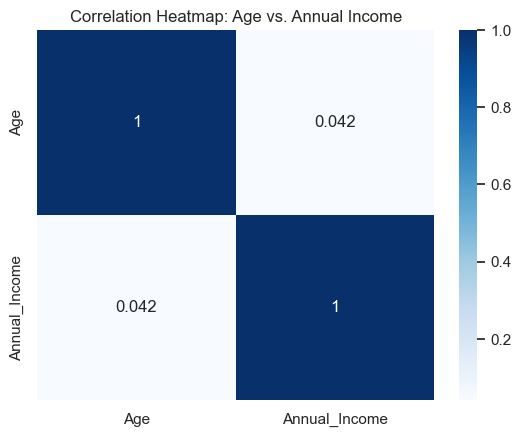

In [30]:
# Calculate correlation coefficient between Age and Annual Income
corr = df['Age'].corr(df['Annual_Income'])
print("Correlation_coefficient: ",corr)
# Create heatmap plot
sns.set(style='white')
sns.heatmap(df[['Age', 'Annual_Income']].corr(), annot=True, cmap='Blues')

# Show plot
plt.title('Correlation Heatmap: Age vs. Annual Income')
plt.show()

Từ biểu đồ Heatmap, ta có thể thấy chính xác rằng mức độ tương quan giữa độ tuổi và thu nhập hàng năm không cao lắm (correlation coefficient = 0.042/1), được biểu thị bởi màu sắc xanh rất nhạt.

Tổng quan, phân tích hai biểu đồ cho thấy rằng không có một mối quan hệ rõ ràng giữa độ tuổi và thu nhập hàng năm của khách hàng trong tập dữ liệu này. Tuy nhiên, ta có thể nhận thấy rằng có một số khách hàng có độ tuổi trung bình cao hơn và thu nhập hàng năm cao hơn, và ngược lại có một số khách hàng có độ tuổi trẻ hơn nhưng thu nhập hàng năm lại cao hơn.

Hai biến có độ tương quan thấp thì đó có thể làm cho mô hình học máy không hiệu quả hoặc không chính xác. Trong mô hình học máy, các thuật toán phụ thuộc vào đầu vào để dự đoán đầu ra, nếu hai biến đầu vào không có mối tương quan với nhau, mô hình có thể không tìm ra được mối quan hệ giữa chúng và không thể dự đoán đầu ra chính xác.

#### **D. Xây dựng mô hình học máy**

Làm khi còn thời gian